In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.colors import Normalize
from matplotlib.cm import get_cmap


sns.set(style="whitegrid")
color_pattern = sns.color_palette()

plt.rcParams["font.family"] = "Times New Roman"

import matplotlib.colors as colors

def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        "trunc({n},{a:.2f},{b:.2f})".format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)),
    )
    return new_cmap

cmap_start = 0
cmap_end = 0.5

cmap_rcgnn = plt.get_cmap("Blues")
cmap_rcgnn = truncate_colormap(cmap_rcgnn, cmap_start, cmap_end)

cmap_with = plt.get_cmap("Greens")
cmap_with = truncate_colormap(cmap_with, cmap_start, cmap_end)

norm_rcgnn = Normalize(vmin=0.8, vmax=1)
norm_with = Normalize(vmin=0.8, vmax=1)

norm = Normalize(vmin=0.85, vmax=1)

In [12]:
df_rcgnn_gat_node1 = pd.read_csv('rcgnn_gat_swap_node1.csv', header=None)
df_rcgnn_gat_node2 = pd.read_csv('rcgnn_gat_swap_node2.csv', header=None)
df_rcgnn_gcn_node1 = pd.read_csv('rcgnn_gcn_swap_node3.csv', header=None)
df_rcgnn_gcn_node2 = pd.read_csv('rcgnn_gcn_swap_node4.csv', header=None)

df_rcgnn_gat_node1.columns = ['hemeng', 'model', 'dataset', 'n_partitions', 'n_hidden', 'n_layers', 'sub_rate', 'rank', 'n_nodes', 'n_edges', 'n_nodes_inner', 'n_nodes_outer', 'n_edges_inner', 'n_edges_outer', 'n_feat', 'n_class', 'swap_bits', 'max_memory_allocated', 'max_memory_reserved', 'time_dur']
df_rcgnn_gat_node2.columns = ['hemeng', 'model', 'dataset', 'n_partitions', 'n_hidden', 'n_layers', 'sub_rate', 'rank', 'n_nodes', 'n_edges', 'n_nodes_inner', 'n_nodes_outer', 'n_edges_inner', 'n_edges_outer', 'n_feat', 'n_class', 'swap_bits', 'max_memory_allocated', 'max_memory_reserved', 'time_dur']
df_rcgnn_gcn_node1.columns = ['hemeng', 'model', 'dataset', 'n_partitions', 'n_hidden', 'n_layers', 'sub_rate', 'rank', 'n_nodes', 'n_edges', 'n_nodes_inner', 'n_nodes_outer', 'n_edges_inner', 'n_edges_outer', 'n_feat', 'n_class', 'swap_bits', 'max_memory_allocated', 'max_memory_reserved', 'time_dur']
df_rcgnn_gcn_node2.columns = ['hemeng', 'model', 'dataset', 'n_partitions', 'n_hidden', 'n_layers', 'sub_rate', 'rank', 'n_nodes', 'n_edges', 'n_nodes_inner', 'n_nodes_outer', 'n_edges_inner', 'n_edges_outer', 'n_feat', 'n_class', 'swap_bits', 'max_memory_allocated', 'max_memory_reserved', 'time_dur']

df_rcgnn_gat_node1['model_dataset_swap_bits'] = df_rcgnn_gat_node1['model'] + '_' + df_rcgnn_gat_node1['dataset'] + '_' + df_rcgnn_gat_node1['swap_bits'].astype(str)
df_rcgnn_gat_node2['model_dataset_swap_bits'] = df_rcgnn_gat_node2['model'] + '_' + df_rcgnn_gat_node2['dataset'] + '_' + df_rcgnn_gat_node2['swap_bits'].astype(str)
df_rcgnn_gcn_node1['model_dataset_swap_bits'] = df_rcgnn_gcn_node1['model'] + '_' + df_rcgnn_gcn_node1['dataset'] + '_' + df_rcgnn_gcn_node1['swap_bits'].astype(str)
df_rcgnn_gcn_node2['model_dataset_swap_bits'] = df_rcgnn_gcn_node2['model'] + '_' + df_rcgnn_gcn_node2['dataset'] + '_' + df_rcgnn_gcn_node2['swap_bits'].astype(str)

df_rcgnn_gat = pd.concat([df_rcgnn_gat_node1, df_rcgnn_gat_node2], axis=0)
df_rcgnn_gcn = pd.concat([df_rcgnn_gcn_node1, df_rcgnn_gcn_node2], axis=0)
df_rcgnn_gat = df_rcgnn_gat.groupby(['model_dataset_swap_bits']).agg({
    'model' : 'first',
    'dataset' : 'first',
    'max_memory_allocated' : 'sum',
    'max_memory_reserved' : 'sum',
})
df_rcgnn_gcn = df_rcgnn_gcn.groupby(['model_dataset_swap_bits']).agg({
    'model' : 'first',
    'dataset' : 'first',
    'max_memory_allocated' : 'sum',
    'max_memory_reserved' : 'sum',
})



In [13]:
df_rcgnn_gat_ogbn_proteins = df_rcgnn_gat[df_rcgnn_gat['dataset'] == 'ogbn-proteins']
df_rcgnn_gat_ogbn_proteins = df_rcgnn_gat_ogbn_proteins.sort_values(by=['max_memory_allocated'])

df_rcgnn_gat_ogbn_products = df_rcgnn_gat[df_rcgnn_gat['dataset'] == 'ogbn-products']
df_rcgnn_gat_ogbn_products = df_rcgnn_gat_ogbn_products.sort_values(by=['max_memory_allocated'])

df_rcgnn_gat_yelp = df_rcgnn_gat[df_rcgnn_gat['dataset'] == 'yelp']
df_rcgnn_gat_yelp = df_rcgnn_gat_yelp.sort_values(by=['max_memory_allocated'])

df_rcgnn_gat_reddit = df_rcgnn_gat[df_rcgnn_gat['dataset'] == 'reddit']
df_rcgnn_gat_reddit = df_rcgnn_gat_reddit.sort_values(by=['max_memory_allocated'])

df_rcgnn_gcn_ogbn_proteins = df_rcgnn_gcn[df_rcgnn_gcn['dataset'] == 'ogbn-proteins']
df_rcgnn_gcn_ogbn_proteins = df_rcgnn_gcn_ogbn_proteins.sort_values(by=['max_memory_allocated'])

df_rcgnn_gcn_ogbn_products = df_rcgnn_gcn[df_rcgnn_gcn['dataset'] == 'ogbn-products']
df_rcgnn_gcn_ogbn_products = df_rcgnn_gcn_ogbn_products.sort_values(by=['max_memory_allocated'])

df_rcgnn_gcn_yelp = df_rcgnn_gcn[df_rcgnn_gcn['dataset'] == 'yelp']
df_rcgnn_gcn_yelp = df_rcgnn_gcn_yelp.sort_values(by=['max_memory_allocated'])

df_rcgnn_gcn_reddit = df_rcgnn_gcn[df_rcgnn_gcn['dataset'] == 'reddit']
df_rcgnn_gcn_reddit = df_rcgnn_gcn_reddit.sort_values(by=['max_memory_allocated'])

In [14]:
min_gcn = df_rcgnn_gcn_ogbn_proteins['max_memory_allocated'].min()
max_gcn = df_rcgnn_gcn_ogbn_proteins['max_memory_allocated'].max()

min_gat = df_rcgnn_gat_ogbn_proteins['max_memory_allocated'].min()
max_gat = df_rcgnn_gat_ogbn_proteins['max_memory_allocated'].max()

x_gcn = np.linspace(min_gcn*1.1, max_gcn, 100)
x_gat = np.linspace(min_gat*1.1, max_gat, 100)

x_gcn = np.append(x_gcn, [max_gcn*1.02]*10)
x_gat = np.append(x_gat, [max_gat*1.01]*10)

y_gcn = [df_rcgnn_gcn_ogbn_proteins[df_rcgnn_gcn_ogbn_proteins['max_memory_allocated'] <= x]['max_memory_allocated'].max() for x in x_gcn]
y_gat = [df_rcgnn_gat_ogbn_proteins[df_rcgnn_gat_ogbn_proteins['max_memory_allocated'] <= x]['max_memory_allocated'].max() for x in x_gat]

with_on_gcn = min_gcn
with_off_gcn = max_gcn * 0.99

with_on_gat = min_gat
with_off_gat = max_gat * 0.99

y_gcn_with = [max([with_on_gcn, with_off_gcn]) if max([with_on_gcn, with_off_gcn]) <= x else min([with_on_gcn, with_off_gcn]) for x in x_gcn]
y_gat_with = [max([with_on_gat, with_off_gat]) if max([with_on_gat, with_off_gat]) <= x else min([with_on_gat, with_off_gat]) for x in x_gat]

C:\Users\wangh\AppData\Local\Temp\ipykernel_19956\2262456156.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rcgnn_gat_tmp['max_memory_reserved'] = df_rcgnn_gat_tmp['max_memory_reserved'] / 1e9
C:\Users\wangh\AppData\Local\Temp\ipykernel_19956\2262456156.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rcgnn_gcn_tmp['max_memory_reserved'] = df_rcgnn_gcn_tmp['max_memory_reserved'] / 1e9


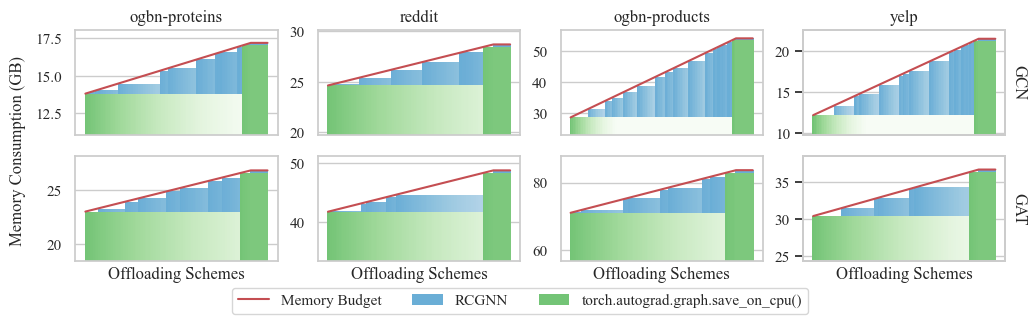

In [22]:
datasets = [
    'ogbn-proteins', 'reddit', 'ogbn-products','yelp', 
]

plt_index = 1

plt.figure(figsize=(12, 3))
plt.subplots_adjust(right=None, left=None, wspace=0.2, hspace=0.2)

for dataset in datasets:
    plt.subplot(2, 4, plt_index)

    df_rcgnn_gat_tmp = df_rcgnn_gat[df_rcgnn_gat['dataset'] == dataset]
    df_rcgnn_gcn_tmp = df_rcgnn_gcn[df_rcgnn_gcn['dataset'] == dataset]

    df_rcgnn_gat_tmp['max_memory_reserved'] = df_rcgnn_gat_tmp['max_memory_reserved'] / 1e9
    df_rcgnn_gcn_tmp['max_memory_reserved'] = df_rcgnn_gcn_tmp['max_memory_reserved'] / 1e9

    df_rcgnn_gat_tmp = df_rcgnn_gat_tmp.sort_values(by=['max_memory_reserved'])
    df_rcgnn_gcn_tmp = df_rcgnn_gcn_tmp.sort_values(by=['max_memory_reserved'])

    min_gcn = df_rcgnn_gcn_tmp['max_memory_reserved'].min()
    max_gcn = df_rcgnn_gcn_tmp['max_memory_reserved'].max()

    min_gat = df_rcgnn_gat_tmp['max_memory_reserved'].min()
    max_gat = df_rcgnn_gat_tmp['max_memory_reserved'].max()

    x_gcn = np.linspace(min_gcn, max_gcn, 100)
    x_gat = np.linspace(min_gat, max_gat, 100)

    x_gcn = np.append(x_gcn, [max_gcn]*10)
    x_gat = np.append(x_gat, [max_gat]*10)

    y_gcn = [df_rcgnn_gcn_tmp[df_rcgnn_gcn_tmp['max_memory_reserved'] <= x]['max_memory_reserved'].max() for x in x_gcn]
    y_gat = [df_rcgnn_gat_tmp[df_rcgnn_gat_tmp['max_memory_reserved'] <= x]['max_memory_reserved'].max() for x in x_gat]

    with_on_gcn = min_gcn
    with_off_gcn = max_gcn * 0.99

    with_on_gat = min_gat
    with_off_gat = max_gat * 0.99

    y_gcn_with = [max([with_on_gcn, with_off_gcn]) if max([with_on_gcn, with_off_gcn]) <= x else min([with_on_gcn, with_off_gcn]) for x in x_gcn]
    y_gat_with = [max([with_on_gat, with_off_gat]) if max([with_on_gat, with_off_gat]) <= x else min([with_on_gat, with_off_gat]) for x in x_gat]

    ratio_gcn = [(y / x) for y, x in zip(y_gcn, x_gcn)]

    colors = cmap_rcgnn(norm_rcgnn(ratio_gcn))
    plt.bar(np.arange(len(x_gcn)), y_gcn, color=colors, label='RCGNN', width=1, edgecolor='none')

    ratio_gcn_with = [(y / x) for y, x in zip(y_gcn_with, x_gcn)]
    colors = cmap_with(norm_with(ratio_gcn_with))
    plt.bar(np.arange(len(x_gcn)), y_gcn_with, color=colors, label='torch.autograd.graph.save_on_cpu()', width=1, edgecolor='none')

    plt.plot(np.arange(len(x_gcn)), x_gcn, color=color_pattern[3], label='Memory Budget')
    plt.title(dataset)
    plt.ylim(min_gcn*0.8, )

    ax = plt.gca()
    if plt_index != 1:
        pass
    else:
        pass
    ax.set_xticks([])
    if plt_index == 4:
        ax2 = ax.twinx()
        ax2.set_yticks([])
        plt.grid(False)
        ax2.set_ylabel('GCN', rotation=270, labelpad=15)

    plt.subplot(2, 4, plt_index+4)
    ratio_gat = [(y / x) for y, x in zip(y_gat, x_gat)]
    colors = cmap_rcgnn(norm_rcgnn(ratio_gat))
    plt.bar(np.arange(len(x_gat)), y_gat, color=colors, label='RCGNN', width=1, edgecolor='none')

    ratio_gat_with = [(y / x) for y, x in zip(y_gat_with, x_gat)]
    colors = cmap_with(norm_with(ratio_gat_with))
    plt.bar(np.arange(len(x_gat)), y_gat_with, color=colors, label='torch.autograd.graph.save_on_cpu()', width=1, edgecolor='none')

    plt.plot(np.arange(len(x_gat)), x_gat, color=color_pattern[3], label='Memory Budget')
    plt.ylim(min_gat*0.8, )

    ax = plt.gca()
    ax.set_xticks([])
    if plt_index != 1:
        pass
    else:
        plt.ylabel('Memory Consumption (GB)',y=1.05, labelpad=15)
    plt.xlabel('Offloading Schemes')
    if plt_index == 4:
        ax2 = ax.twinx()
        plt.grid(False)
        ax2.set_yticks([])
        ax2.set_ylabel('GAT', rotation=270, labelpad=15)
    plt_index += 1

handles_list, labels_list = [], []
for ax in plt.gcf().axes:
    handles, labels = ax.get_legend_handles_labels()
    handles_list.extend(handles)
    labels_list.extend(labels)

by_label = dict(zip(labels_list, handles_list))
plt.legend(by_label.values(), by_label.keys(), loc='upper center', bbox_to_anchor=(-1.4, -0.18), ncol=len(by_label))
plt.savefig('granularity-all.pdf', bbox_inches='tight')